## Coupled equations

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

Similar numerical methods to those used for single equations can be used to solve coupled or simultaneous ones. Coupled reactions are commonly found in chemical kinetics, MD simulations, enzyme kinetics, and catalysis; also in the decay of radioactive atoms as well as in the spread of diseases and the predator - prey type behaviour of animals. In each case, species interact or convert into one another and at least two differential equations are needed to describe this. In many cases, these sets of equations cannot be solved algebraically and a numerical method has therefore to be used. As an example, we deliberately start with a pair of equations that can be solved analytically, and this will allow comparison of the numerical solution with the algebraic one. The equations are

$$\displaystyle \frac{dy}{dt}=\cos(t)-x \qquad \frac{dx}{dt}=\sin(t)-1-y  \tag{32}$$

subject to the initial condition $x(t_0) = 1,\; y(t_0) = -3$ when $t_0 = 0$. Notice that the first equation $dy/dt = \cdots$ is a function of $x$ and $t$ and the second a function of $y$ and $t$ but in general $dy/dt$ and $dx/dt$ could be functions of $x$, $y$, and $t$. These equations can be solved algebraically using the method of operators (Chapter 10.4) by making a second-order equation out of the pair and the solutions are 

$$\displaystyle y = \sin(t) - \sinh(t) - 1 - 2 \cosh(t)\quad\text{and}\quad x = \cosh(t) + 2 \sinh(t)$$

These functions are plotted in Fig. 11 as dashed lines. The result of a modified Euler integration using Algorithm 15 from $t = 0 \cdots 3$ is also shown as the solid lines with $N = 200$ steps.

![Drawing](num-methods-fig11.png)

Figure 11. The algebraic solution to the two equations (32) (dashed lines) over the range $-4 \to 4$ and the modified Euler numerical solution (solid line) with $200$ steps over the range $t = 0 \to 3$.
______

The code shown below for the calculation is similar to that in Algorithm 9, except that two functions are defined and both $x$ and $y$ are incremented. The modified Euler method can be used just as easily as with a single equation, but for clarity, the simpler method is illustrated.

In [2]:
# Algorithm 14;   Euler's method for coupled equations

dydt = lambda t,x : np.cos(t) - x        # eqns 32
dxdt = lambda t,y : np.sin(t) - 1 - y

t0 = 0.0
maxt = 2.0
x0 = 1
y0 = -3
n  = 200

Eulery = np.zeros(n,dtype=float)   # define arrays to hold results
Eulerx = np.zeros(n,dtype=float)
dtime  = np.zeros(n,dtype=float)

h = (maxt - t0)/n
x = x0
y = y0
t = t0
Eulery[0] = y0
Eulerx[0] = x0
dtime[0]  = t0
for i in range(1,n):
    y = y + h*dydt(t,x)
    x = x + h*dxdt(t,y)
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass


### 5.1 Modified Euler and Runge - Kutta equations

The Euler method for coupled equations can be improved in the same way as for equation (23). The resulting equations with which to calculate $dy/dt = f (t, x, y)$ and $dx/dt = g(t, x, y)$ are changed from

$$\displaystyle  y_{n+1} = y_n + hf(t_n,x_n,y_n) \qquad \text{and} \qquad x_{n+1} = x_n + hg(t_n,x_n,y_n)$$

to

$$\displaystyle  y_{n+1} = y_n + \frac{h}{2}[f(t_n,x_n,y_n) + f(t_n+h, x_n+hg(t_n,x_n,y_n), y_n+hf(t_n,x_n,y_n))]$$

$$\displaystyle  x_{n+1} = x_n + \frac{h}{2}[g(t_n,x_n,y_n) +  g(t_n+h, x_n+hg(t_n,x_n,y_n), y_n+hf(t_n,x_n,y_n))  ]$$

which is much more clearly written out as 

$$\displaystyle \qquad\qquad\begin{array}{ll}
\displaystyle x_{n+1} = x_n+\frac{h}{2}(L_1+L_2) & \displaystyle y_{n+1} = y_n+\frac{h}{2}(k_1+k_2) \\[10pt]
\displaystyle k_1=f(t_n,x_n,y_n) & \displaystyle L_1=g(t_n,x_n,y_n)\\[10pt]
\displaystyle k_2=f(t_n+h, x_n+hL_1, y_n+hk_1) & \displaystyle L_2=g(t_n+h, x_n+hL_1, y_n+hk_1)\\
\end{array}\qquad\qquad\qquad \text{33}$$

This can be translated quite easily into Python, because only the part within the for loop is changed. The rest is based on algorithm 14.

In [3]:
# Algorithm 15;   Heun's or modified Euler for coupled equations

dydt = lambda t,x,y : np.cos(t) - x        # eqns 32 it does not matter that y is not present
dxdt = lambda t,x,y : np.sin(t) - 1 - y    

for i in range(1,n):
    k1 = dydt(t,x,y)
    L1 = dxdt(t,x,y)
    k2 = dydt(t + h, x + L1*h, y + k1*h)
    L2 = dxdt(t + h, x + L1*h, y + k1*h)
    
    y = y + h*(k1 + k2)/2
    x = x + h*(L1 + L2)/2
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass

The Runge - Kutta method can also be used with coupled equations in a similar way as in the last algorithm; notice how the $k$'s are defined in terms of $dydt$ and add to terms in $y$ and $L$'s to those in $x$. Based on Algorithm 11 the modified equations are only in the for loop. 

In [4]:
# Algorithm 16     Runge - Kutta fourth order (RK4)  method for coupled equations.
for i in range(1,n):
    k1 = dydt(t,x,y)
    L1 = dxdt(t,x,y)
    
    k2 = dydt(t + h/2, x + L1*h/2, y + k1*h/2)
    L2 = dxdt(t + h/2, x + L1*h/2, y + k1*h/2)
    
    k3 = dydt(t + h/2, x + L2*h/2, y + k2*h/2)
    L3 = dxdt(t + h/2, x + L2*h/2, y + k2*h/2)
    
    k4 = dydt(t + h, x + L3*h, y + k3*h)
    L4 = dxdt(t + h, x + L3*h, y + k3*h)
    
    y = y + h*(k1 + 2*k2 + 2*k3 + k4)/6
    x = x + h*(L1 + 2*L2 + 2*L3 + L4)/6
    t = t + h
    Eulery[i] = y
    Eulerx[i] = x
    dtime[i]  = t
    pass

### 5.2 The Polymerase Chain Reaction PCR. A real world example of coupled equations

The polymerase chain reaction (PCR) is a technique, that in a few hours at most, can vastly multiply the number of selected fragments of DNA by thousands to millions of times. The method has recently been widely used as a test for the presence of Covid-19 virus but has been used long before that to detect a whole range diseases caused by viruses, bacteria and parasites. Other methods can be used for many diseases but PCR has the advantage of being able to amplify minute amounts of DNA. This technique is also important as part of fingerprint detection. The technique was invented by K. Mullis in 1983. He subsequently shared the Nobel Prize in Chemistry in 1993 for his 'invention of the polymerase chain reaction (PCR) method' with M. Smith for his 'fundamental contributions to the establishment of oligonucleotide-based, site-directed mutagenesis and its development for protein studies'. 

The target, a double-stranded DNA molecule is initially denatured by heating into two single strands. This DNA had previously been split into segments of a few hundred to to a few thousand base pairs. The denaturing is a cooperative effect and occurs over a narrow temperature range, $90-95\,^\text{o}$C, see Kittel and Bragg-Zimm zippers, chapters 1, 3.(ii) and Chapter 7,13.5 respectively. The denaturing is the first stage of the PCR cycle. The narrow temperature range of both denaturing and also subsequent steps, described shortly, mean that very precise and rapid temperature control is required. Because of the cooperative nature of denaturing and extending DNA the Arrhenius equation does not generally apply when considering how rate constants change with temperature.

Two small oligonucleotides (typically $15-30$ base pairs) are chemically synthesised and that are complementary to sequences on opposite strands of the target DNA sequence (3' and 5' ends) and that flank the target to be amplified, are used as primers. To bind the primers to the single strands it is necessary to reform the H-bonds and enable $\pi-\pi$ stacking to occur which requires some cooling to the solution but there is a balance: cooling must not be too much otherwise the the single strands recombine. However, if there is no cooling there is too much energy and the H bonds and pi-stacking cannot occur, i.e. unless cooled the equilibrium is too far towards separated primer and single stranded DNA species. This step is called 'annealing' or 'hybridisation'.  

The third stage is to convert the single strand with bound primer to form the new double stranded DNA and this is achieved by a DNA polymerase (protein) enzyme. This is called 'extension' or 'elongation'. This should be done at the optimum temperature for the polymerase ($68-72\,^\text{o}$C). The most commonly used polymerase is the heat resistant enzyme initially isolated from the bacterium _Thermus aquaticus_ ('Taq Poly') that lives in hot springs and can resist ($100\,^\text{o}$C).  Because DNA always pairs bases as G-C and A-T the DNA single strand makes a template on which to form an identical double stranded DNA using the nucleotides (i.e. base-sugar-phosphate molecules or dNTPs) present in solution.  The chain is completed when the new DNA is produced and fed-back in the denaturing step.

After the first cycle, each target molecule of DNA has been copied twice thus the number of DNA copies is doubled, and after, for example $25$ cycles there are $2^{25} \approx 33\cdot 10^6$ copies. The mixture to perform the PCR, besides buffer, are the DNA fragments to be copied, the primer sequence, often artificially synthesised, the Taq polymerase and the nucleotide bases (dNTPs).

To detect the DNA a fluorphore can be used, and this can have great sensitivity because single photons can easily be detected. There are several strategies, the simplest is to use a dye that is largely non-fluorescent when in solution but when intercalated into the DNA becomes highly fluorescent. Other methods use a dye-quencher molecule such that when it is bound the dye and quencher are separated and the fluorescence yield increases dramatically. Similarly to this two dyes may be linked in the same molecule and undergo Forster resonance energy transfer (FRET) when close to one another but not when kept apart. 

![Drawing](num-methods-fig20c.png)

Figure 11a. Sketch of the PCR method. Redrawn from NobelPrize.org. Nobel Prize Outreach AB 2022.
________

### PCR rate equations

The rate equations for a basic PCR are shown below using the notation, $D$, double strand DNA, $S$ single strand DNA, $E$ the Taq Poly enzyme and $P$ the primer.  We implicitly assume that there are enough molecules that the rate equation is accurate, and that a Monte-Carlo method is not needed. The steps taken in order my varying the temperature are

(A) Dissociation of DNA into two strands at the highest temperature $\approx 95^{o}$C

(B) Primer sequence attaches to single stranded DNA at the lowest temperature $\approx 72^{o}$C

(C) The Taq enzyme adds base pairs to primer-single stranded DNA to make new double stranded DNA. This extension phase assumes the Michaelis - Menten scheme and occiurs at $\approx 85^{o}$C. 

Each of these steps has to occur at a different temperature so this has to be closely controlled, being raised and lowered as necessary to move the reaction towards product. The order is $95 \to 72 \to 85$ which is then repeated. To calculate this numerically the rate constants have to be temperature dependent. This is done in two ways, the enzyme reaction is very specific and so a Gaussian temperature profile is used. If the temperature is too high or too low the rate constant tends to zero, i.e. $k_2$ (see below) varies as $k_2\exp(-(T_0-T)^2/\sigma)$. All the other rate constants $k_i$ must have a value of zero below a critical temperature and so are given the sigmoidal form $k_i/(1+\exp(-(T_0-T)/\sigma_0)$ which rises from zero below $\approx T_0$ to a _constant_ value $k_i$ above: $\sigma_0$ controls how fast the function rises, but should be only a few degrees. For simplicity the temperature profile was made sinusoidal (rather than stepwise) with a period of $60$ seconds starting at the highest temperature. Such rapid cycling will be easier small device such as one using microchannels to contain the species as with a 'lab-on-a-chip'.

The reaction scheme is 

$$\displaystyle \begin{array}\\ 
D & \overset{{\large k_D}}{\underset{{\large k_{-D}}} \rightleftharpoons} &  2S\qquad\qquad \qquad\qquad 95\mathrm{^{o} C,denaturing}\\
S + P &\overset{{\large k_{sp}}}{\underset{{\large k_{-sp}}} \rightleftharpoons}& SP \qquad\qquad \qquad\qquad 72\mathrm{^{o}C, annealing}\\
E + SP &\overset{{\large k_{1}}}{\underset{{\large k_{-1}}} \rightleftharpoons}& E\cdot SP \overset{k_2}\longrightarrow E+D\;\;\qquad 85\mathrm{^{o}C, extending}\\
\end{array}$$

and we ignore the possibility that the enzyme $E$ may also decompose at the higher temperatures as this is known to be small $\approx 0.1%$ at each cycle. 

The scheme can be solved numerically and although the rate equations may look formidable they are easily formed from the scheme above and can be integrated either using an inbuilt Python integrator or a Euler method.

$$\displaystyle \begin{align}\frac{d[D]}{dt} & = -k_D[D]+\frac{1}{2} k_{-D}[S]^2 + k_2[E\cdot SP]\\
\frac{d[S]}{dt}  & = +2k_D[D] - k_{-D}[S]^2-k_{sp}[S][P]+k_{-sp}[SP]\\
\frac{d[P]}{dt} &= -k_{sp}[S][P]+k_{-sp}[SP]\\
\frac{d[SP]}{dt} & = +k_{sp}[S][P] -k_{-sp}[SP] - k_1[E][SP] + k_{-1}[E\cdot SP]\\
\frac{d[E\cdot SP]}{dt} & = + k_1[E][SP] - (k_{-1}+k_2)[E\cdot SP]\\
\frac{d[E]}{dt} & = -k_1[E][SP]+(k_{-1}+k_2)[E\cdot SP]\\
\end{align}$$

The result of integrating is shown in fig 11b assuming DNA segments of $b=200$ base pairs. The concentration of the double stranded DNA ($D$, red), the single strand ($S$, green) and the complex ($E\cdot SP$, black) are shown. The initial amounts and rate constants are shown in the table (SI units are used as appropriate for first and second order reactions).

$$\displaystyle \begin{array}\\
k_D=3000/b, & k_{-D}=10^6,& k_{sp}=5\cdot10^5, & k_{-sp}=10^{-4},& k_1=10^8, & k_{-1}=10, & k_2=60\\
D_0=10^{-15}, &P_0=2\cdot10^{-7}, & E_0=5\cdot 10^{-9},& S_0=SP_0=E\cdot SP_0=0 & \sigma=8 & \sigma_0=2\\
\end{array}$$

Notice that only a tiny amount of DNA need be present initially but that the primer is in vast excess over this and the enzyme $E$. This makes the annealing step pseudo-first order and $k_{sp}[P] \gg k_{-sp}$, but mainly the excess dose not limit the amount of $D$ produced as $P$ is consumed in the reaction. Of course there must be also sufficient nucleotides present to make the new DNA. The amount of all these concentrations depend on the particular situation but usually this is determined when the detection limit is exceeded by a suitable margin. Similarly to primer, increasing the amount of enzyme will also produce more DNA in a given time because $k_1[E][SP]$ is increased.

The unusual oscillatory behaviour is due to the temperature cycling which causes the rate constants to turn on and off. The decreasing region in $D$ is due to the temperature increasing which starts DNA denaturing into two strands $S$ which correspondingly increases (green). More double stranded DNA $D$ is produced as the enzyme reaction $E+SP$ starts and which stops when the temperature changes making $[D]$ constant. Recall that the temperature range is narrow over which this reaction occurs, i.e. $k \sim\exp(-(T_0-T)^2/\sigma)$ as described above so the increase in $D$ is short lived.

![Drawing](num-methods-fig20a.png)

Figure 11b. The populations of various species *vs*. time in the PCR reaction. See text for details.
__________

The pattern of populations in fig 11b is complex. Looking at the scheme shows that initially $D$ is denatured and therefore $S$ rises and in the last step where new $D$ is formed the opposite occurs which suggests that plotting $D$ vs. $S+SP$ may show this behaviour. Figure 12c clearly shows exactly this and that the final $D$ is increasing in each cycle.

![Drawing](num-methods-fig20d.png)

Figure 11c. Plot showing variation of D with S+SR. the increase and decrease of $D$ is clear and clearly shows the amplification. The slight kink in the extension is the horizontal part of fig 11b.
_____

Although the amount of double stranded DNA is increasing it is hard to see by how much in fig 11b. By totaling $[D]$ into groups of periods, then the exponential increase is more obvious as shown in fig 11d. The doubling time in the upper part of the plot is $\approx 89$ s. The doubling time is calculated assuming $[D]=[D_0]e^{kt}$ and using $t_2=\ln(2)/k$ just as if a half-life were calculated.

![Drawing](num-methods-fig20b.png)

Figure 11d. The total amount of double stranded DNA, $[D]$ *vs*. time. The circles show the cycles. The dashed line is an exponential fit with a doubling time of $\approx 89$ s.

### 5.3 Second and higher order differential equations. The Numerov algorithm and the Schroedinger equation. 

The most important second order equation you will meet is most likely to be the Schroedinger equation. The numerical solution to find the energy (eigenvalues) of this is dealt with in section 9 of this chapter but the Numerov algorithm used to calculate the wavefunction is described below after the general solution of other second order equations  is described.

Second and higher order equations can be easily reduced to a set of first-order equations and solved as coupled equations. Second-order equations can also be converted directly into difference equations for numerical evaluation and, in some cases, such as with the diffusion equation, this is the most convenient way to solve them.

The equation

$$\displaystyle  \frac{d^2y}{dx^2}+3\frac{dy}{dx}+5y=0 \tag{34}$$

is second order and can be solved algebraically making possible a comparison with a numerical method. Suppose that the initial conditions are $y_0 = 0$ and $dy/dx|_0 = 1$. These mean that the value of $y$ at $x = 0$ is zero, and that the gradient, also at $x = 0$, is one. The strategy is to take the lowest derivative $dy/dx$, even if it is not explicitly present in the equation, and make this equal to a new variable $z$; for instance, $z = dy/dx$. The equation now becomes

$$\displaystyle \frac{dy}{dz}=z; \qquad \frac{dz}{dx}=-3z-5y \tag{35}$$

As a check, by substitution the original equation is reformed. The equations, initial values, and the Euler method based on that in Algorithm 14 are written as:

In [5]:
dydx = lambda   z: z
dzdx = lambda y,z: -3*z - 5*y 
y0 = 0
z0 = 1
x0 = 0

and in the for loop the increments for $x$ and $y$ are similar to those used previously. The numerical result is shown in Fig. 12 with $200$ points used in the numerical integration, together with the algebraic solution shown as the dashed line. A fairly good fit to the algebraic line is obtained, but to improve this, more points could be used in the integration or a better integration method used, such as illustrated in Algorithm 15. The algebraic solution can be found using SymPy, and has the form of an exponentially damped sine wave.

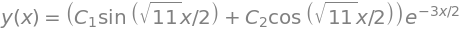

In [6]:
x, y, C1, C2 = symbols('x, y, C1, C2')
y  = Function('y')
eq = diff(y(x),x,x) + 3*diff(y(x),x)+5*y(x)
ans= dsolve(eq,y(x))
ans

Including the initial condition $y(0)=0,\,x=0$ produces $C_2=0$. The derivative is $1$ at $x=0$,

In [7]:
dydx = diff( exp(-3*x/2)*C1*sin(sqrt(11)*x/2),x)
simplify(dydx)

and when $x=0,\;dy/dx=1=C_1\sqrt{11}/2$ thus $\displaystyle y=\frac{2}{\sqrt{11}}e^{-3x/2}\sin\left(\frac{\sqrt{11}x}{2}\right)$.

![Drawing](num-methods-fig12.png) 

Figure12 Numerical (solid line) and algebraic solution to equation 34.
_____

#### **Higher order equations**

The higher order equation

$$\displaystyle  \frac{d^3y}{dx^3}+a\frac{d^2y}{dx^2}-y=0 $$

can similarly be reduced to a number of first-order equations by making substitutions. Two substitutions are needed here because of the third-order derivative. These can be 

$$\displaystyle dy/dx=z,\; dz/dx=w,\; dw/dx=-aw+y$$

and the substitutions have the following effect, 

$$\displaystyle dw/dx = d^2z/dx^2 = d^3y/dx^3\quad w = dz/dx = d^2y/dx^2$$

The initial conditions must also be specified before a solution can be found. In this case, there are, in effect, three integration steps because of the third power of the derivative. The three initial conditions must specify, at the initial $x$ chosen, a value of $y, \;dy/dt$ and $d^2y/dt^2$.


### 5.4 The Numerov method

The conventional Numerov method is used to solve second-order differential equations which do not have a first derivative and are of the form 

$$\displaystyle \frac{d^2y}{dx^2} + f(x)y = s(x)  \tag{35a}$$

and is therefore a suitable method to use for the numerical solution of the Schroedinger equation and of Poisson's equation. The solution results in a recursive equation that is simple to implement, involves fewer function evaluations that does the Runge-Kutta method and has precision of $h^6$.

The Schroedinger equation is solved next. There are methods that are described in other chapters such as the Shooting Method (section 9) and expansion in a basis set in the Quantum Matrices chapter 8.  

The  Schroedinger equation is normally written as 

$$\displaystyle -\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx} +  V(x)\psi(x) = E\psi(x)  \tag{35b} $$

where  $V(x)$ represents the potential energy, a quadratic, for example, in a harmonic oscillator. Rearranging this  gives 

$$\displaystyle\frac{d^2\psi(x)}{dx} -\frac{2m}{\hbar^2}\left(V(x)-E\right)\psi(x)=0$$

in which case when put in the form of equation 35a, 

$$\displaystyle f(x)=-\frac{2m}{\hbar^2}\left(V(x)-E\right),\quad s(x)=0$$ 

Note that the each  energy eigenvalue $E$ must be known before its wavefunction $\psi$ can be calculated.  The Shooting method described in section 9 can be used to find these. 

The Poisson equation of electromagnetism also has the form of equation 35a, i.e. 

$$\displaystyle \frac{d^2\varphi}{dx^2}=-4\pi\rho(x)$$

where $\rho(x)$ is charge density. In this case $f(x)=0;\; s=-4\pi\rho(x)$.

The essential part of the Numerov algorithm is to produce a numerical version of $d^2y/dx^2$ and this is done by expanding $y$ as a Taylor series i.e. expand $y$ about a point $x_0=x+h$, where $h$c is a small increment in $x$, and then about $x-h$ and adding the two series. The result produces an expression in the second and fourth derivatives $y'',\; y'''' $. On rearranging the second derivative of obtained but it also contains the fourth derivative. This is next evaluated by acting on the original equation with the operator $(1+d^2y/dx^2)$. 

The calculation is done over a grid  of points, just as in the Euler and Runge - Kutta methods and where $h$ represents the increment in $x$. Instead of using $x+h$ some authors use $x_n$ to represent the $n^\text{th}$ point; we convert to this notation at the end of the derivation.

The Taylor expansion of a function $y$ centered around $x_0$ is (see chapter 5.6) 

$$\displaystyle y(x)=y(x_0)+(x-x_0)y'+\frac{(x-x_0)^2}{2!}y''+\frac{(x-x_0)^3}{2!}y'''+\frac{(x-x_0)^4}{4!}y''''+\cdots + \frac{(x-x_0)^n}{n!}y^n+\cdots$$ 

where the derivatives $y'\;y''$ etc are each evaluated at $x_0$. When expanded about $h=x - x_0$ where $h$ is small compared to $x$  produces

$$\displaystyle y(x_0+h)=y(x_0)+hy'+\frac{h^2}{2!}y''+\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$ 

but for clarity as $x_0$ can be any point $x$ we make the notational change $x_0 \to x$ so that the last equation becomes

$$\displaystyle y(x+h)=y(x)+hy'+\frac{h^2}{2!}y''+\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$ 

and similarly changing $h \to -h$

$$\displaystyle y(x-h)=y(x)-hy'+\frac{h^2}{2!}y''-\frac{h^3}{2!}y'''+\frac{h^4}{4!}y''''+\cdots $$

Limiting the expansion to the fourth power and adding the last two equations produces

$$\displaystyle y(x+h)+y(x-h) =2y(x)+h^2y''+2\frac{h^4}{4!}y''''   +O(h^6)\tag{35c}$$ 

which gives a recursive equation if  the two derivatives $y''$ and $ y''''$ can be found. The second derivative is defined from the original equation and the fourth order derivative can be obtained by differentiating both sides of this equation (eqn 35a) 

$$\displaystyle \frac{d^2y}{dx^2} \equiv y''=- f(x)y + s(x)$$ 

twice and expanding terms as above, but only to second powers in $y$. As the differentiation will involve products, because both $f$ and $y$ are functions of $x$, it is simpler to define a new function $g(x) = -f(x)y(x)+s(x)$, making the original equation (35a) $y''=g(x)$ and expand this just as was done above for $y$ to find the second derivative. Doing this using in the same way that produced equation 35c but ignoring the forth power term gives 

$$\displaystyle y'''' \equiv g'' = \frac{g(x+h) -2g(x)+  g(x-h)  }{ h^2} +O(h^2)$$ 

This can now be substituted into the  equation 35c to produce

$$\displaystyle y(x+h) = 2y(x) -  y(x-h)  + h^2g(x) + \frac{h^4}{12}\left(\frac{g(x+h) -2g(x)+  g(x-h)  }{ h^2}\right) +O(h^6)$$ 

Simplifying and replacing $g(x)$ with  $-f(x)y(x)+s(x)$ gives

$$\displaystyle \qquad\qquad\begin{align}y(x+h)\left(1+\frac{h^2}{12}f(x+h)\right)&= 2y(x)\left( 1-\frac{5h^2}{12}f(x) \right) \\&-y(x-h)\left(1+\frac{h^2}{12}f(x-h)  \right) \\&+\left( s(x+h)+10s(x) +s(x-h)\right )\frac{h^2}{12}\end{align} \qquad\qquad\qquad\text{(35d)}$$

In the specific case of the Schroedinger equation $s(x)=0$ and then

$$\displaystyle y(x+h)\left(1+\frac{h^2}{12}f(x+h)\right)= 2y(x)\left( 1-\frac{5h^2}{12}f(x) \right) -y(x-h)\left(1+\frac{h^2}{12}f(x-h)  \right) $$


Writing this in terms of indices as required in an algorithm means making the changes $y(x+h) \to y_{n+1},\; y(x) \to f_n,\; y(x-h) \to y_{n-1}$

$$\displaystyle y_{n+1}\left(1+\frac{h^2}{12}f_{n+1}\right)= 2y_n\left( 1-\frac{5h^2}{12}f_n \right) -y_{n-1}\left(1+\frac{h^2}{12}f_{n-1}  \right) \tag{ 35e}$$

which means that $y$ must be known at two points, $n$ and $n+1$ at the start of the calculation. Normally starting at large $x$ values relative to the minimum of the potential means that here the wavefunctuon is zero and so initial values such as  $y_0 =0 ,\;y_1 = 0.001$ can be used. The wavefunction can be normalised at the end of the calculation ($\int\psi dx=1$) so these values are not critical. The function $f$ is known at all points via $V(x)$  but as noted the eigenvalue $E$ must be known. Note also the sign of $f(x)$ when using the Schroedinger equation $\displaystyle f(x)= -\frac{2m}{\hbar^2}\left(V(x)-E\right)$.  

As an example calculation, the wavefunction of a quantum harmonic oscillator with $V= (k/2)x^2$ is calculated using  constants $\mu=1,\;\hbar = 1,\; k = 20 $. The eigenvalues are $\displaystyle E_n=\hbar \sqrt{\frac{k}{\mu} }\left(n+\frac{1}{2}\right)$. This method does not perform well when, for example, the potential has a double well and in conjunction with the shooting method because numerical precision becomes an issue. In this case more sophisticated algorithms are needed. These are usually the ones that are provided by the computer language you use, $\mathtt{odeint(\cdots)}$ in Python/Scipy for example.

In [8]:
# Algorithm 11.16a; Numerov method

def numerov(V, x, E0):
    n = len(x)                                   # number of data points
    y = np.zeros(n,dtype = float)                # make array for wavefunction y
    f = lambda x: -2.0*mu/hbar**2*(V(x) - E0)    # calculate function f 
    h = (x[1]-x[0])                              # increment in x

    y[0] = 0.0                                   # guess two starting values 
    y[1] = 0.001
    q = h**2/12.0                                # define once outside loop
    for i in range(2,n):
        y[i] = ( 2*y[i-1]*(1 - 5*q*f(x[i-1])) - y[i-2]*(1 + q*f(x[i-2])) )/ (1 + q*f(x[i]) )  # eqn 35e
    return y
#------------

num = 1001                    # number of data points, odd so that there is a point at x=0
xn  = 3.0                     # +- x extent of potential V
x   = np.linspace(-xn,xn,num) # make array of x values  
n   = 2                       # quantum number 
k   = 20.0                    # force constant
hbar= 1.0                     # define constants
mu  = 1.0
E0  = hbar*np.sqrt(k/mu)*(n + 1/2)   # eigenvalue 

V = lambda x :0.5*k*x**2      # potentiual 

y = numerov(V,x,E0)           # calculate wavefunction

#plt.plot(x,y)
#plt.show()

![Drawing](num-methods-fig11a.png)

figure 12a. Quantum harmonic potential  and the $n=2$ wavefunction calculated using the Numerov method and the Schroedinger equation. The constants are arbitrary; force constant $k=20,\; \mu = 1,\; \hbar=1$.